In [240]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [241]:
# directory for the small subset of audio files

# small_audio = os.environ.get('fma_small/fma_small')
small_audio = 'fma_small/fma_small'

In [242]:
def get_trackID_from_dir(audio_dir):
    track_ids = []
    for _, dir_name, files in os.walk(audio_dir):
        if dir_name == []:
            track_ids.extend(int(file[:-4]) for file in files)
            # print(dir_name, files)
    return track_ids

In [243]:
get_trackID_from_dir(small_audio)

[2,
 5,
 10,
 140,
 141,
 148,
 182,
 190,
 193,
 194,
 197,
 200,
 203,
 204,
 207,
 210,
 211,
 212,
 213,
 255,
 256,
 368,
 424,
 459,
 534,
 540,
 546,
 574,
 602,
 615,
 620,
 621,
 625,
 666,
 667,
 676,
 690,
 694,
 695,
 704,
 705,
 706,
 707,
 708,
 709,
 714,
 715,
 716,
 718,
 777,
 814,
 821,
 822,
 825,
 853,
 890,
 892,
 897,
 993,
 995,
 997,
 998,
 1039,
 1040,
 1066,
 1069,
 1073,
 1075,
 1082,
 1083,
 1087,
 1102,
 1193,
 1195,
 1196,
 1197,
 1249,
 1259,
 1270,
 1276,
 1277,
 1278,
 1417,
 1427,
 1443,
 1482,
 1510,
 1544,
 1642,
 1644,
 1649,
 1661,
 1663,
 1666,
 1673,
 1680,
 1681,
 1682,
 1683,
 1684,
 1685,
 1686,
 1687,
 1688,
 1689,
 1701,
 1702,
 1703,
 1704,
 1706,
 1720,
 1732,
 1733,
 1735,
 1736,
 1883,
 1891,
 1893,
 1924,
 1925,
 1929,
 1930,
 2012,
 2096,
 2097,
 2099,
 3263,
 3264,
 3265,
 3266,
 3270,
 3271,
 3272,
 3273,
 3274,
 3492,
 3532,
 3533,
 3534,
 3535,
 3537,
 3538,
 3573,
 3598,
 3624,
 3707,
 3708,
 3720,
 3721,
 3722,
 3724,
 3725,
 37

In [244]:
# ex: fma_small/fma_small/000002.mp3
# tid must be a string of 6 digits

def get_audio_path(audio_dir, tid):
    # track_id_name = '{:6}'.format(tid) , doesn't work
    track_id_name = '{:6s}'.format(tid)
    print(audio_dir, track_id_name[:3], track_id_name)
    return os.path.join(audio_dir, track_id_name[:3], track_id_name + '.mp3')

In [245]:
# issue with first folder '000', doesn't print 000, so path is incomplete (), FIXED
# get_audio_path(small_audio, 2)

# must enter the tid as a string with 6 digits
get_audio_path(small_audio, '000002')

fma_small/fma_small 000 000002


'fma_small/fma_small\\000\\000002.mp3'

In [246]:
get_audio_path(small_audio, '001039')

fma_small/fma_small 001 001039


'fma_small/fma_small\\001\\001039.mp3'

In [247]:
get_audio_path(small_audio, '099041')

fma_small/fma_small 099 099041


'fma_small/fma_small\\099\\099041.mp3'

In [248]:
get_audio_path(small_audio, '100478')

fma_small/fma_small 100 100478


'fma_small/fma_small\\100\\100478.mp3'

In [249]:
get_audio_path(small_audio, '155066')

fma_small/fma_small 155 155066


'fma_small/fma_small\\155\\155066.mp3'

In [250]:
# check/confirm that there are 8000 tracks in the small subset
# audio_dir = 'fma_small/fma_small'
track_ids = get_trackID_from_dir(small_audio)
print(len(track_ids))

8000


In [251]:
def create_melSpect(tid):
    filename = get_audio_path(small_audio, tid)
    y, sr = librosa.load(filename)
    spect = librosa.feature.melspectrogram(y = y, sr = sr, n_fft = 2048, hop_length = 1024)
    spect = librosa.power_to_db(spect, ref = np.max)
    return spect.T

In [252]:
def plot_melSpect(tid):
    spect = create_melSpect(tid)
    print(spect.shape)
    plt.figure(figsize = (10, 4))
    librosa.display.specshow(spect.T, y_axis = 'mel', fmax = 8000, x_axis = 'time')
    plt.colorbar(format = '%+2.0f dB')
    plt.show()

fma_small/fma_small 099 099041
(647, 128)


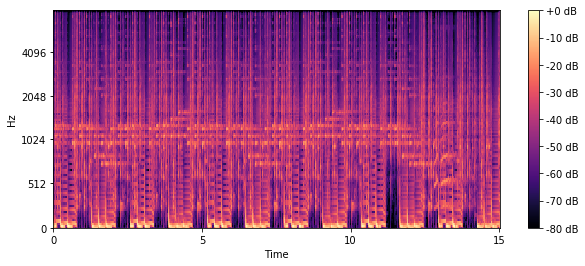

In [253]:
plot_melSpect('099041')

#### Load tracks small dataset, keeping genre and track IDs

In [255]:
filepath = 'fma_metadata/tracks.csv'

tracks = pd.read_csv(filepath, index_col = 0, header = [0, 1])
# tracks.head()

keep_cols = [('set', 'split'),
('set', 'subset'),('track', 'genre_top')]

df = tracks[keep_cols]
df = df[df[('set', 'subset')] == 'small']

df['track_id'] = df.index
df.head(10)
# df.shape, (8000, 4)

set                track track_id
               split subset     genre_top         
track_id                                          
2           training  small       Hip-Hop        2
5           training  small       Hip-Hop        5
10          training  small           Pop       10
140         training  small          Folk      140
141         training  small          Folk      141
148       validation  small  Experimental      148
182             test  small          Rock      182
190         training  small          Folk      190
193         training  small          Folk      193
194         training  small          Folk      194

In [256]:
df.shape

(8000, 4)

In [257]:
df[('track', 'genre_top')].unique()

array(['Hip-Hop', 'Pop', 'Folk', 'Experimental', 'Rock', 'International',
       'Electronic', 'Instrumental'], dtype=object)

In [258]:
dict_genres = {'Electronic':1, 'Experimental':2, 'Folk':3, 'Hip-Hop':4, 
               'Instrumental':5,'International':6, 'Pop' :7, 'Rock': 8  }

In [259]:
def create_array(df):
    genres = []
    X_spect = np.empty((0, 640, 128))
    count = 0
    for idx, row in df.iterrows():
        try:
            count += 1
            track_id = int(row['track_id'])
            genre = str(row[('track', 'genre_top')])
            mel_spec = create_melSpect(track_id)
            
            spect = spect[:640, :]
            X_spect = np.append(X_spect, [spect], axis=0)
            genres.append(dict_genres[genre])
            if count % 100 == 0:
                print("Currently processing: ", count)
        except:
            print("Couldn't process: ", count)
            continue
    y_arr = np.array(genres)
    return X_spect, y_arr            

In [260]:
df[('set', 'split')].unique()

array(['training', 'validation', 'test'], dtype=object)

##### Create test, train, and validation subsets

In [261]:
# 80% train, 10% validation, 10% test

df_test = df[df[('set', 'split')] == 'test']
df_train = df[df[('set', 'split')] == 'training']
df_valid = df[df[('set', 'split')] == 'validation']

print(df_train.shape, df_valid.shape, df_test.shape)

(6400, 4) (800, 4) (800, 4)


In [262]:
X_test, y_test = create_array(df_test)

Couldn't process:  1
Couldn't process:  2
Couldn't process:  3
Couldn't process:  4
Couldn't process:  5
Couldn't process:  6
Couldn't process:  7
Couldn't process:  8
Couldn't process:  9
Couldn't process:  10
Couldn't process:  11
Couldn't process:  12
Couldn't process:  13
Couldn't process:  14
Couldn't process:  15
Couldn't process:  16
Couldn't process:  17
Couldn't process:  18
Couldn't process:  19
Couldn't process:  20
Couldn't process:  21
Couldn't process:  22
Couldn't process:  23
Couldn't process:  24
Couldn't process:  25
Couldn't process:  26
Couldn't process:  27
Couldn't process:  28
Couldn't process:  29
Couldn't process:  30
Couldn't process:  31
Couldn't process:  32
Couldn't process:  33
Couldn't process:  34
Couldn't process:  35
Couldn't process:  36
Couldn't process:  37
Couldn't process:  38
Couldn't process:  39
Couldn't process:  40
Couldn't process:  41
Couldn't process:  42
Couldn't process:  43
Couldn't process:  44
Couldn't process:  45
Couldn't process:  

Couldn't process:  643
Couldn't process:  644
Couldn't process:  645
Couldn't process:  646
Couldn't process:  647
Couldn't process:  648
Couldn't process:  649
Couldn't process:  650
Couldn't process:  651
Couldn't process:  652
Couldn't process:  653
Couldn't process:  654
Couldn't process:  655
Couldn't process:  656
Couldn't process:  657
Couldn't process:  658
Couldn't process:  659
Couldn't process:  660
Couldn't process:  661
Couldn't process:  662
Couldn't process:  663
Couldn't process:  664
Couldn't process:  665
Couldn't process:  666
Couldn't process:  667
Couldn't process:  668
Couldn't process:  669
Couldn't process:  670
Couldn't process:  671
Couldn't process:  672
Couldn't process:  673
Couldn't process:  674
Couldn't process:  675
Couldn't process:  676
Couldn't process:  677
Couldn't process:  678
Couldn't process:  679
Couldn't process:  680
Couldn't process:  681
Couldn't process:  682
Couldn't process:  683
Couldn't process:  684
Couldn't process:  685
Couldn't pr